In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [4]:
import matplotlib.pyplot as plt


In [5]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show

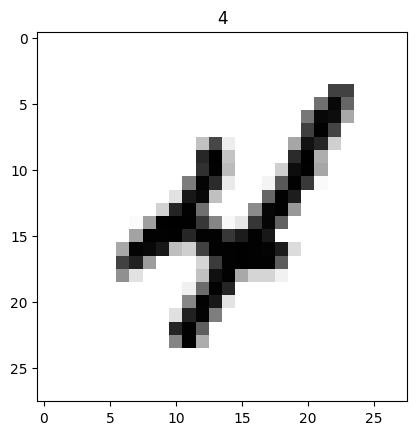

In [6]:
for i in range(10):
  plot_input_img(i)

In [7]:
#Data preproceesing
#Normalizing the image in range [0,1]
X_train=X_train/255
X_test=X_test/255

In [8]:
#Expand the dimesion of image to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [9]:
#convert classes to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
from keras.api._v2.keras import activations
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
his=model.fit(X_train,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.2127 - accuracy: 0.9354 - val_loss: 0.0709 - val_accuracy: 0.9779
Epoch 2/50
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 3/50
1313/1313 [==============================] - 57s 43ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0499 - val_accuracy: 0.9853
Epoch 4/50
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0454 - val_accuracy: 0.9866
Epoch 5/50
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 6/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0410 - val_accuracy: 0.9872
Epoch 7/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0419 -

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_prob

array([[5.5111458e-21, 1.0792517e-21, 5.2801236e-12, ..., 9.9999994e-01,
        8.4653870e-16, 5.1810990e-12],
       [6.6140231e-12, 1.2106891e-13, 9.9999994e-01, ..., 2.0476113e-24,
        1.6142251e-15, 1.6622241e-21],
       [6.0945053e-16, 9.9999982e-01, 1.0729624e-14, ..., 4.1184633e-10,
        1.6657117e-10, 5.6950921e-15],
       ...,
       [1.6591714e-35, 6.3971054e-24, 5.3186869e-30, ..., 1.0284949e-20,
        5.4848983e-17, 4.3517228e-18],
       [4.0281550e-19, 4.9909514e-25, 3.8341970e-22, ..., 5.8783611e-23,
        9.6629984e-09, 7.8072263e-15],
       [1.1600375e-12, 2.7917795e-24, 9.3678407e-13, ..., 8.0410108e-26,
        3.3860761e-10, 4.2143787e-17]], dtype=float32)

In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9925

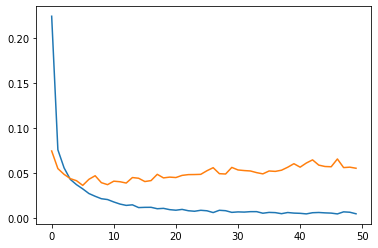

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

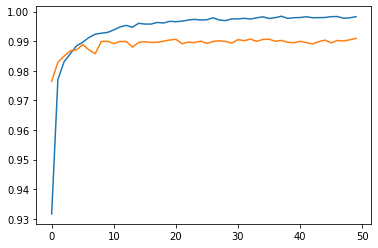

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])